In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2
import os

from tensorflow.keras.layers import Conv2D, Flatten, Dense,Input,concatenate,MaxPooling2D
from keras.applications import ResNet152
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow import keras

import swifter
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

#from keras.layers import Flatten, Dense, Input,concatenate
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Activation, Dropout
#from keras.models import Model
#from keras.models import Sequential
#import tensorflow as tf
from scipy import spatial
import warnings
warnings.filterwarnings("ignore")


In [4]:
## Load pre-trained model

saved_model =keras.models.load_model('fashion-mnist.h5')
## Extracted features
basemodel = Model(inputs=saved_model.input, outputs=saved_model.get_layer('fc2').output)

In [10]:
##To get feature vector from saved model
def get_feature_vector_MM(img):

    img1 = cv2.resize(img, (28, 28))
    feature_vector = basemodel.predict(img1.reshape(1, 28, 28, 1))
    return feature_vector
d1={}
path = Path(os.getcwd())
path=path.parent
slave = os.path.join(path,"static")
slave = os.path.join(slave,"Source")
slave_filess = [ file_cont for file_cont in os.listdir(slave) if file_cont.split('.')[1]=='jpg' ]
slave_filess
##Cosine similarity
def calculate_similarity_MM(vector1, vector2):
    return (1-spatial.distance.cosine(vector1, vector2))
def getfeaturevectorforallsourceimages_MM(image):
    image_f=image
    contrast_file = cv2.imread(image_f)
    contrast_file = cv2.resize(contrast_file,(28,28),1)
    f2=get_feature_vector_MM(contrast_file)
    return f2
def displayimage_MM(imgpath):
    pil_im = Image.open(imgpath, 'r')
    plt.figure()
    plt.imshow(np.asarray(pil_im))
for s in slave_filess:
    imagepath=os.path.join(slave,s)
    print(imagepath)
    d1[s]=getfeaturevectorforallsourceimages_MM(imagepath)
import pickle
file_to_write = open("outputvector_MM.pickle", "wb")
pickle.dump(d1, file_to_write)

<IPython.core.display.Javascript object>

C:\Users\deesaw\Desktop\Image_Search\static\Source\1163.jpg


ValueError: cannot reshape array of size 2352 into shape (1,28,28,1)

In [ ]:
def displayimage_MM(imgpath):
    pil_im = Image.open(imgpath, 'r')
    plt.figure()
    plt.imshow(np.asarray(pil_im))
Sourceimage='C:\\Users\\deesaw\\Desktop\\Image_Search\\static\\Source\\1541.jpg'
f1=getfeaturevectorforallsourceimages(Sourceimage)
print(Sourceimage)
displayimage(Sourceimage)
path = Path(os.getcwd())
path=path.parent
slave = os.path.join(path,"static")
slave = os.path.join(slave,"Source")
for ed in d:
    similarity=calculate_similarity(f1,d[ed])
    if similarity > 0.8:
        #print(ed,':',similarity)
        pathofimage=os.path.join(slave,ed)
        displayimage_MM(pathofimage)  

In [2]:
## Load vgg16 pre-trained model
vgg16 = keras.applications.ResNet152(weights='imagenet', include_top=True, pooling='max', input_shape=(224, 224, 3))
## Extracted features
basemodel = Model(inputs=vgg16.input, outputs=vgg16.get_layer('avg_pool').output)

##To get feature vector
def get_feature_vector(img):

    img1 = cv2.resize(img, (224, 224))
    feature_vector = basemodel.predict(img1.reshape(1, 224, 224, 3))
    return feature_vector

##Cosine similarity
def calculate_similarity(vector1, vector2):
    return (1-spatial.distance.cosine(vector1, vector2))

def preprocessimage(image):
    image1=image.split('::')[0]
    contrast_file = cv2.imread(image1)
    contrast_file = cv2.resize(contrast_file,(224,224),3)
    f1=get_feature_vector(contrast_file)
    image2=image.split('::')[1]
    contrast_file = cv2.imread(image2)
    contrast_file = cv2.resize(contrast_file,(224,224),3)
    f2=get_feature_vector(contrast_file)
    similarity=calculate_similarity(f1,f2)
    return similarity
    

In [3]:
# example of loading the resnet50 model
from keras.applications import ResNet152
# load model
model = ResNet152()
# summarize the model
model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_0_conv (Conv2D)    (None, 14, 14, 1024) 525312      conv3_block8_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_3_conv (Conv2D)    (None, 14, 14, 1024) 263168      conv4_block1_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_0_bn (BatchNormali (None, 14, 14, 1024) 4096        conv4_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv4_bloc

conv4_block12_add (Add)         (None, 14, 14, 1024) 0           conv4_block11_out[0][0]          
                                                                 conv4_block12_3_bn[0][0]         
__________________________________________________________________________________________________
conv4_block12_out (Activation)  (None, 14, 14, 1024) 0           conv4_block12_add[0][0]          
__________________________________________________________________________________________________
conv4_block13_1_conv (Conv2D)   (None, 14, 14, 256)  262400      conv4_block12_out[0][0]          
__________________________________________________________________________________________________
conv4_block13_1_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block13_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block13_1_relu (Activatio (None, 14, 14, 256)  0           conv4_block13_1_bn[0][0]         
__________

conv4_block27_1_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block27_1_conv[0][0]       
__________________________________________________________________________________________________
conv4_block27_1_relu (Activatio (None, 14, 14, 256)  0           conv4_block27_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block27_2_conv (Conv2D)   (None, 14, 14, 256)  590080      conv4_block27_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block27_2_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block27_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block27_2_relu (Activatio (None, 14, 14, 256)  0           conv4_block27_2_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

Total params: 60,419,944
Trainable params: 60,268,520
Non-trainable params: 151,424
__________________________________________________________________________________________________


In [4]:
    path = Path(os.getcwd())
    path=path.parent
    print(path)
    slave = os.path.join(path,"static")
    slave = os.path.join(slave,"Source")
    master = os.path.join(path,"uploads_f")#os.path.join(path,uploaded_file)
    print(master)
    print(slave)
    master_files = pd.DataFrame([ file_cont for file_cont in os.listdir(master) if file_cont.split('.')[1]=='jpg' ],columns=['MasterName'])
    master_files['Index'] = 1
    master_files['Filepath'] =  master+'\\'+master_files['MasterName']
    slave_files = pd.DataFrame([ file_cont for file_cont in os.listdir(slave) if file_cont.split('.')[1]=='jpg' ],columns=['SlaveName'])
    slave_files['Index'] = 1
    slave_files['Filepath'] = slave+'\\'+slave_files['SlaveName']
    df_slave_master =  master_files.merge(slave_files,on='Index',how="left")
    df_slave_master['MasterPath']=df_slave_master['Filepath_x']+'::'+df_slave_master['Filepath_y']
    df_slave_master['similarity']  =df_slave_master['MasterPath'].swifter.apply(preprocessimage)
    print(df_slave_master)
    result=df_slave_master[['MasterName','SlaveName','similarity']]
    result.columns=['Uploaded Image','Source Image'  ,'Similarity Score']
    results=result
    results = results[results['Similarity Score']>=0.7]
    results['Similarity Score']=results['Similarity Score'].round(decimals=2)
    results['Comment']=results.apply(lambda x : x["Source Image"][:-4]+" is similar to "+x["Uploaded Image"][:-4]+" and the similarity score is "+str(x['Similarity Score']),axis=1)
    results.columns=['Uploaded Image' ,'Source Image' ,'Similarity Score','Comment']
    print(results)

<IPython.core.display.Javascript object>

C:\Users\deesaw\Desktop\Image_Search
C:\Users\deesaw\Desktop\Image_Search\uploads_f
C:\Users\deesaw\Desktop\Image_Search\static\Source



   MasterName  Index                                         Filepath_x  \
0   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
1   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
2   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
3   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
4   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
5   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
6   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
7   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
8   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
9   15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
10  15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
11  15898.jpg      1  C:\Users\deesaw\Desktop\Image_Search\uploads_f...   
12  15898.jpg      1  C:

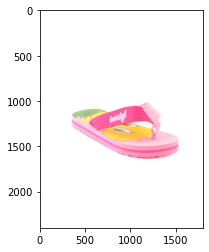

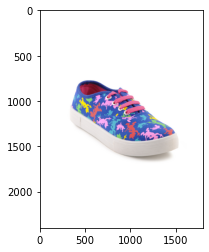

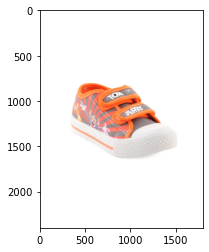

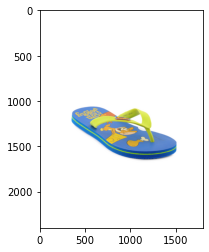

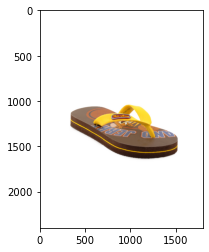

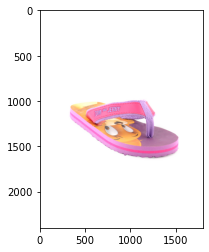

In [5]:

for img in results['Source Image']:
    imgpy=os.path.join(slave,img)
    pil_im = Image.open(imgpy, 'r')
    plt.figure()
    plt.imshow(np.asarray(pil_im))



#Run This cell as a batch job when you add a new image

In [4]:
d={}
path = Path(os.getcwd())
path=path.parent
slave = os.path.join(path,"static")
slave = os.path.join(slave,"Source")
slave_filess = [ file_cont for file_cont in os.listdir(slave) if file_cont.split('.')[1]=='jpg' ]
slave_filess
def getfeaturevectorforallsourceimages(image):
    image_f=image
    contrast_file = cv2.imread(image_f)
    contrast_file = cv2.resize(contrast_file,(224,224),3)
    f2=get_feature_vector(contrast_file)
    return f2
def displayimage(imgpath):
    pil_im = Image.open(imgpath, 'r')
    plt.figure()
    plt.imshow(np.asarray(pil_im))
for s in slave_filess:
    imagepath=os.path.join(slave,s)
    print(imagepath)
    d[s]=getfeaturevectorforallsourceimages(imagepath)
import pickle
file_to_write = open("outputvector.pickle", "wb")
pickle.dump(d, file_to_write)


<IPython.core.display.Javascript object>

C:\Users\deesaw\Desktop\Image_Search\static\Source\1163.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1164.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1165.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\134.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1525.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1526.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1528.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1529.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1530.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1531.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1532.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1533.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1534.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1535.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1536.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1537.jpg
C:\Users\deesaw\Desktop\Image_Search\stat

C:\Users\deesaw\Desktop\Image_Search\static\Source\1765.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1766.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1782.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1783.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1784.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1785.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1786.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1787.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1788.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1789.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1790.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1791.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1792.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1793.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1794.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1795.jpg
C:\Users\deesaw\Desktop\Image_Search\sta

C:\Users\deesaw\Desktop\Image_Search\static\Source\1973.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1976.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1977.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1978.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1981.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1982.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1983.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1984.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1985.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1986.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1988.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1989.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1990.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1991.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1992.jpg
C:\Users\deesaw\Desktop\Image_Search\static\Source\1993.jpg
C:\Users\deesaw\Desktop\Image_Search\sta

C:\Users\deesaw\Desktop\Image_Search\static\Source\1541.jpg


<IPython.core.display.Javascript object>

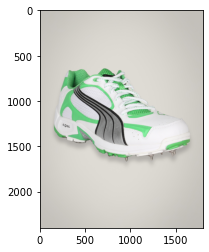

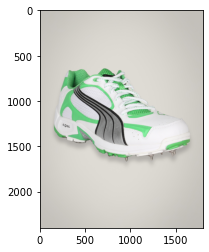

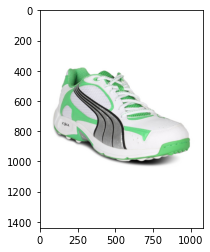

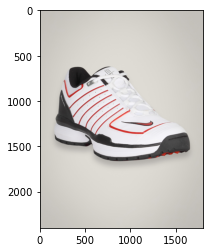

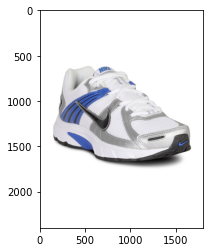

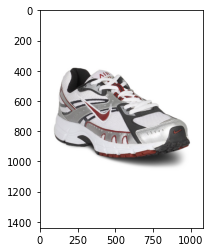

In [23]:
def displayimage(imgpath):
    pil_im = Image.open(imgpath, 'r')
    plt.figure()
    plt.imshow(np.asarray(pil_im))
Sourceimage='C:\\Users\\deesaw\\Desktop\\Image_Search\\static\\Source\\1541.jpg'
f1=getfeaturevectorforallsourceimages(Sourceimage)
print(Sourceimage)
displayimage(Sourceimage)
path = Path(os.getcwd())
path=path.parent
slave = os.path.join(path,"static")
slave = os.path.join(slave,"Source")
for ed in d:
    similarity=calculate_similarity(f1,d[ed])
    if similarity > 0.8:
        #print(ed,':',similarity)
        pathofimage=os.path.join(slave,ed)
        displayimage(pathofimage)      
        

In [19]:
import pickle
with open('filename.pickle', 'wb') as handle:
    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
with open('filename.pickle', 'rb') as handle:
    bb = pickle.load(handle)

In [22]:
for a,b in bb.items():
    print(a)

1163.jpg
1164.jpg
1165.jpg
134.jpg
1525.jpg
1526.jpg
1528.jpg
1529.jpg
1530.jpg
1531.jpg
1532.jpg
1533.jpg
1534.jpg
1535.jpg
1536.jpg
1537.jpg
1538.jpg
1539.jpg
1540.jpg
1541.jpg
1542.jpg
1543.jpg
1544.jpg
1545.jpg
1546.jpg
1547.jpg
1548.jpg
1549.jpg
1550.jpg
1551.jpg
1552.jpg
1553.jpg
1554.jpg
1555.jpg
1556.jpg
1557.jpg
1558.jpg
1559.jpg
1561.jpg
1562.jpg
1563.jpg
1565.jpg
1566.jpg
1567.jpg
1569.jpg
1570.jpg
1571.jpg
1572.jpg
1573.jpg
1575.jpg
1577.jpg
1578.jpg
1579.jpg
1580.jpg
1581.jpg
1582.jpg
1583.jpg
1584.jpg
1587.jpg
1588.jpg
1590.jpg
1591.jpg
1592.jpg
1594.jpg
1595.jpg
1596.jpg
1597.jpg
1598.jpg
1599.jpg
1603.jpg
1604.jpg
1605.jpg
1607.jpg
1608.jpg
1609.jpg
1610.jpg
1611.jpg
1612.jpg
1613.jpg
1614.jpg
1615.jpg
1616.jpg
1617.jpg
1618.jpg
1619.jpg
1620.jpg
1621.jpg
1622.jpg
1623.jpg
1624.jpg
1625.jpg
1626.jpg
1627.jpg
1628.jpg
1634.jpg
1635.jpg
1636.jpg
1637.jpg
1638.jpg
1641.jpg
1642.jpg
1644.jpg
1645.jpg
1646.jpg
1647.jpg
1648.jpg
1649.jpg
1651.jpg
1653.jpg
1654.jpg
1656.jpg
16